# Template for OpenAI

In [5]:
import os
from openai import OpenAI

client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY"),
    organization="org-quoOHKsufyoBqWBh9T8ov8Ma"
)

In [6]:
def chat_with_gpt(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]

    response = client.chat.completions.create(
        messages=messages,
        model=model,
        temperature=0,
        n=1,
        #max_tokens=120,
        stop=None
    )
    
    return response.choices[0].message.content

In [8]:
# Example usage:
prompt = "What is the capital city of France?" 
response = chat_with_gpt(prompt) 
print(response)

The capital city of France is Paris.


# Load Data
And perform summary analysis

In [7]:
import pandas as pd

df_customers = pd.read_csv('olist_customers_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_product_category_translation = pd.read_csv('product_category_name_translation.csv')

In [5]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [7]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [8]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [11]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
df_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [14]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [15]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [7]:
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [8]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [11]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [13]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [14]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [15]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [16]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [17]:
df_product_category_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [18]:
df_product_category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [19]:
df_product_category_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [12]:
prompt = "I have a Panda dataframe with an order_id and customer_id columns. \
How can I check whether each cusotmer made exactly one order of if there are any customers with more than one order?" 
print(chat_with_gpt(prompt))

To check whether each customer made exactly one order or if there are any customers with more than one order, you can use the following steps:

1. Group the DataFrame by the 'customer_id' column.
2. Count the number of unique 'order_id' values for each customer using the `nunique()` function.
3. Check if any customer has more than one order by using the `any()` function on the resulting Series.

Here's an example code snippet that demonstrates this process:

```python
import pandas as pd

# Assuming your DataFrame is named 'df'
# Grouping by 'customer_id' and counting unique 'order_id' values
customer_orders = df.groupby('customer_id')['order_id'].nunique()

# Checking if any customer has more than one order
has_multiple_orders = customer_orders.gt(1).any()

if has_multiple_orders:
    print("There are customers with more than one order.")
else:
    print("Each customer made exactly one order.")
```

This code will output whether there are any customers with more than one order or if e

In [15]:

# Grouping by 'customer_id' and counting unique 'order_id' values
customer_orders = df_orders.groupby('customer_id')['order_id'].nunique()

# Checking if any customer has more than one order
has_multiple_orders = customer_orders.gt(1).any()

if has_multiple_orders:
    print("There are customers with more than one order.")
else:
    print("Each customer made exactly one order.")

Each customer made exactly one order.


In [24]:
order_counts = df_orders['customer_id'].value_counts()
print(order_counts)

customer_id
9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: count, Length: 99441, dtype: int64


In [25]:
prompt = "In my customers' dataframe I have colums customer_id and customer_unique_id. How can I check how one relates \
to the other and which one is the correct identifier?" 
print(chat_with_gpt(prompt))

To check how the columns "customer_id" and "customer_unique_id" relate to each other and determine the correct identifier, you can perform the following steps:

1. Check for unique values: Verify if both columns have unique values. If they do, it suggests that each column represents a distinct identifier. You can use the `nunique()` function to count the number of unique values in each column.

```python
unique_customer_id = df['customer_id'].nunique()
unique_customer_unique_id = df['customer_unique_id'].nunique()

print("Unique customer_id values:", unique_customer_id)
print("Unique customer_unique_id values:", unique_customer_unique_id)
```

2. Compare values: Compare the values in both columns to identify any patterns or similarities. You can use the `value_counts()` function to count the occurrences of each value in each column.

```python
customer_id_counts = df['customer_id'].value_counts()
customer_unique_id_counts = df['customer_unique_id'].value_counts()

print("customer_id va

In [28]:
unique_customer_id = df_customers['customer_id'].nunique()
unique_customer_unique_id = df_customers['customer_unique_id'].nunique()

print("Unique customer_id values:", unique_customer_id)
print("Unique customer_unique_id values:", unique_customer_unique_id)

customer_id_counts = df_customers['customer_id'].value_counts()
customer_unique_id_counts = df_customers['customer_unique_id'].value_counts()

print("customer_id value counts:")
print(customer_id_counts)

print("\ncustomer_unique_id value counts:")
print(customer_unique_id_counts)

customer_id_unique_values = customer_id_counts.index
customer_unique_id_unique_values = customer_unique_id_counts.index

customer_id_multiple_unique_ids = df_customers[df_customers['customer_id'].isin(customer_id_unique_values[customer_id_counts > 1])]
customer_unique_id_multiple_ids = df_customers[df_customers['customer_unique_id'].isin(customer_unique_id_unique_values[customer_unique_id_counts > 1])]

print("customer_id with multiple customer_unique_id:")
print(customer_id_multiple_unique_ids)

print("\ncustomer_unique_id with multiple customer_id:")
print(customer_unique_id_multiple_ids)

Unique customer_id values: 99441
Unique customer_unique_id values: 96096
customer_id value counts:
customer_id
06b8999e2fba1a1fbc88172c00ba8bc7    1
c023f30c1147aeb0358474f3b1dbc707    1
b5cbf43f42281920a175fc99650c91d6    1
19f4e983f8f05b7de16670f8a0cf0ac7    1
229ac14c6ee6d6a606264ebcc861beb7    1
                                   ..
31665bd5bc542687ab54c9fd9ed9917b    1
37fb9cce079a4887c96b59bae2011d05    1
1d815f3ad9b2017b6da2c4f1cbb1180b    1
6b05c8f3a25a71005d5eb9b51766c333    1
274fa6071e5e17fe303b9748641082c8    1
Name: count, Length: 99441, dtype: int64

customer_unique_id value counts:
customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
081f07439678af2da7755a0aa572154d     1
9c57789a6a587f4efcfb01e36c106014     1
9e4c21635f640562de1a6976374fba03     1
06c0ea6ee892364d1608ee47aa

In [31]:
relationship = df_customers.groupby('customer_unique_id')['customer_id'].nunique()

print("\nSummary of the relationship between customer_unique_id and customer_id:")
print(f"Min: {relationship.min()}")
print(f"Max: {relationship.max()}")
print(f"Mean: {relationship.mean()}")
print(f"Count of unique customer_id values per customer_unique_id:\n{relationship.value_counts().sort_index()}")



Summary of the relationship between customer_unique_id and customer_id:
Min: 1
Max: 17
Mean: 1.0348089410589412
Count of unique customer_id values per customer_unique_id:
customer_id
1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64


# Data Cleaning

## Removing duplicates

In [32]:
prompt = "How do I remove duplicate values from a Pandas dataframe?" 
print(chat_with_gpt(prompt))

To remove duplicate values from a Pandas dataframe, you can use the `drop_duplicates()` method. This method returns a new dataframe with duplicate rows removed.

Here's an example of how to use `drop_duplicates()`:

```python
import pandas as pd

# Create a sample dataframe with duplicate values
data = {'col1': [1, 2, 3, 3, 4, 5, 5],
        'col2': ['a', 'b', 'c', 'c', 'd', 'e', 'e']}
df = pd.DataFrame(data)

# Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

# Print the resulting dataframe
print(df_no_duplicates)
```

Output:
```
   col1 col2
0     1    a
1     2    b
2     3    c
4     4    d
5     5    e
```

In this example, the original dataframe `df` contains duplicate rows. The `drop_duplicates()` method is used to remove these duplicates, and the resulting dataframe `df_no_duplicates` is printed.


In [35]:
# Remove duplicate rows
display(df_customers.drop_duplicates())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [36]:
# Remove duplicate rows
display(df_orders.drop_duplicates())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [38]:
# Remove duplicate rows
display(df_order_items.drop_duplicates())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [39]:
# Remove duplicate rows
display(df_order_payments.drop_duplicates())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [40]:
# Remove duplicate rows
display(df_order_reviews.drop_duplicates())

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [41]:
# Remove duplicate rows
display(df_products.drop_duplicates())

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [42]:
# Remove duplicate rows
display(df_sellers.drop_duplicates())

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [43]:
# Remove duplicate rows
display(df_product_category_translation.drop_duplicates())

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Handling Missing Values

In [46]:
prompt = "I have missing values in my dataframe. It looks like the number of missing values might be correlated in some columns. \
How can I check if the missing values form some pattern?" 
print(chat_with_gpt(prompt))

To check if the missing values form some pattern in your dataframe, you can use various methods. Here are a few approaches you can try:

1. Visualize missing values: Plotting the missing values can help identify any patterns visually. You can use libraries like `missingno` or `seaborn` to create a heatmap or bar plot of missing values. This will show if there are any columns or rows with a higher concentration of missing values.

2. Correlation matrix: Calculate the correlation matrix of your dataframe using the `corr()` function. By default, this will calculate the correlation between numerical columns. If there is a correlation between the missing values in different columns, it might indicate a pattern.

3. Cross-tabulation: Create a cross-tabulation or contingency table using the `pd.crosstab()` function. This will show the frequency distribution of missing values across different columns. If there is a significant relationship between missing values in different columns, it will b

In [47]:
prompt = "Show code to use seaborn to create a heatmapof missing values" 
print(chat_with_gpt(prompt))

To create a heatmap of missing values using seaborn, you can use the `heatmap()` function from the seaborn library. Here's an example code snippet:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'df'
# with missing values

# Create a boolean mask indicating missing values
missing_values = df.isnull()

# Create a heatmap using seaborn
sns.heatmap(missing_values, cbar=False, cmap='viridis')

# Set plot title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()
```

In this code, we first create a boolean mask `missing_values` using the `isnull()` function on the DataFrame `df`. This mask will have `True` values where there are missing values and `False` values where there are non-missing values.

Then, we use the `heatmap()` function from seaborn to create the heatmap. We pass the `missing_values` mask as the data to be plotted. We set `cbar=False` to remove the colorbar, and `cmap='viridis'` to use the 'viridis'

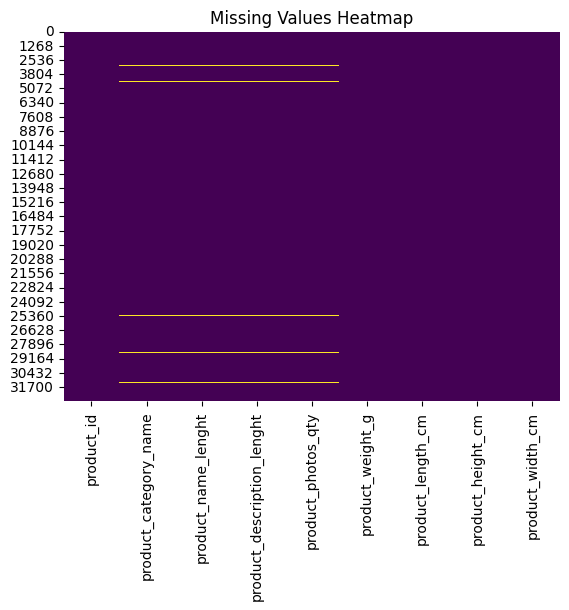

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boolean mask indicating missing values
missing_values = df_products.isnull()

# Create a heatmap using seaborn
sns.heatmap(missing_values, cbar=False, cmap='viridis')

# Set plot title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()

       product_id  product_category_name  product_name_lenght  \
0           False                  False                False   
1           False                  False                False   
2           False                  False                False   
3           False                  False                False   
4           False                  False                False   
...           ...                    ...                  ...   
32946       False                  False                False   
32947       False                  False                False   
32948       False                  False                False   
32949       False                  False                False   
32950       False                  False                False   

       product_description_lenght  product_photos_qty  product_weight_g  \
0                           False               False             False   
1                           False               False             Fal

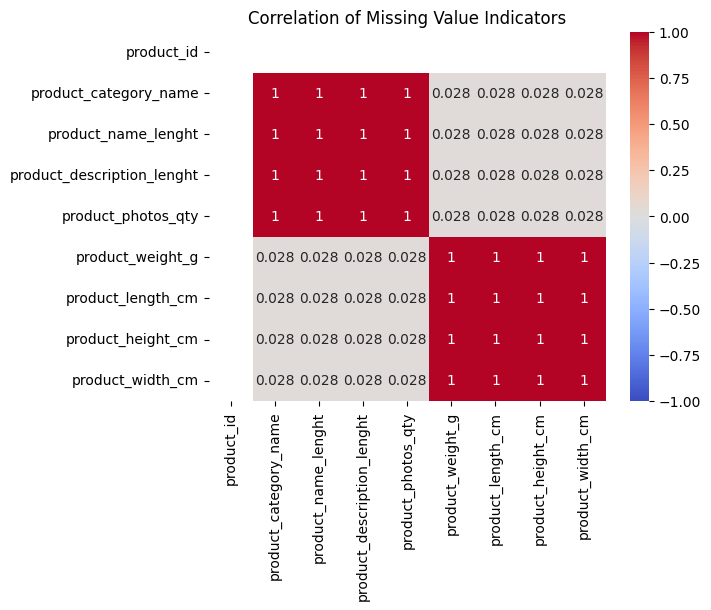

In [11]:
missing_corr = missing_indicator.corr()
print(missing_values)
print(missing_corr)
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
plt.title("Correlation of Missing Value Indicators")
plt.show()

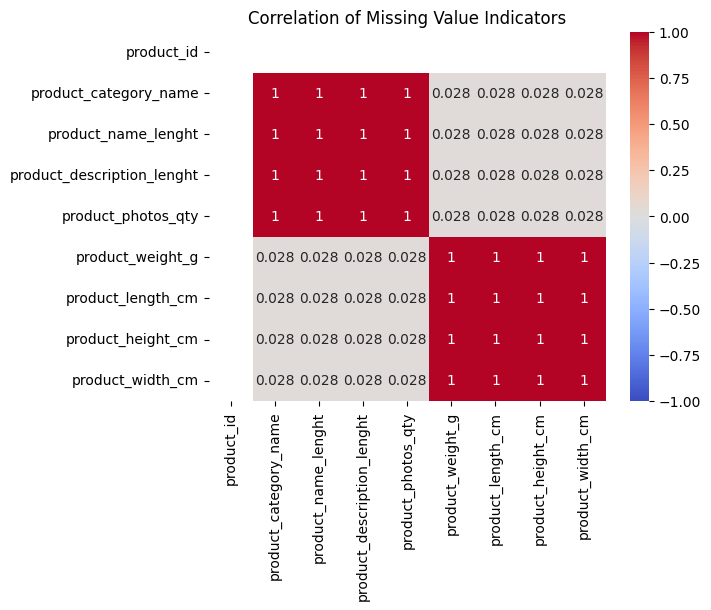

In [6]:
# Create a DataFrame indicating which values are missing 
missing_indicator = df_products.isna()
# Compute the correlation between the missing value indicators 
missing_corr = missing_indicator.corr()
# Visualize the correlation matrix using a heatmap
sns.heatmap(missing_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
plt.title("Correlation of Missing Value Indicators")
plt.show()

In [12]:
prompt = "I have a product_id in my dataframe, how can I find a rown where all other colums except product_id have a null value?" 
print(chat_with_gpt(prompt))

To find a row where all other columns except the product_id have a null value, you can use the `isnull()` function along with the `all()` function in pandas.

Here's an example code snippet that demonstrates how to achieve this:

```python
import pandas as pd

# Assuming your dataframe is named 'df'
# and the column containing product_id is named 'product_id'

# Find the row where all other columns except product_id have a null value
row_with_null_values = df[df.drop('product_id', axis=1).isnull().all(axis=1)]

# Print the resulting row
print(row_with_null_values)
```

In this code, `df.drop('product_id', axis=1)` drops the 'product_id' column from the dataframe. Then, `isnull()` checks for null values in all remaining columns. Finally, `all(axis=1)` checks if all values in each row are True (i.e., all other columns except product_id have null values). The resulting boolean mask is used to filter the dataframe and retrieve the desired row.


In [13]:
# Find the row where all other columns except product_id have a null value
row_with_null_values = df_products[df_products.drop('product_id', axis=1).isnull().all(axis=1)]

# Print the resulting row
print(row_with_null_values)

                             product_id product_category_name  \
18851  5eb564652db742ff8f28759cd8d2652a                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
18851                  NaN                         NaN                 NaN   

       product_weight_g  product_length_cm  product_height_cm  \
18851               NaN                NaN                NaN   

       product_width_cm  
18851               NaN  


# Correcting data entry errors

Some of the methods described in section 2.1 can help identify the oddities, e.g., df[‘column_name’].value_counts() can help you spot values that occur only once, which may be suspicious if you expect uniform distribution. However, detecting and correcting data entry errors requires a combination of these techniques, along with domain knowledge and manual inspection.

The specific type of data entry error analysis we would like to point your attention to is outlier detection and treatment.

# Data Validation

In [14]:
prompt = "How can I perform data validation on my dataframes?" 
print(chat_with_gpt(prompt))

There are several ways to perform data validation on dataframes in Python. Here are a few common methods:

1. Checking for missing values: Use the `isnull()` function to identify missing values in your dataframe. You can then use the `sum()` function to count the number of missing values in each column.

```python
import pandas as pd

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
```

2. Checking for unique values: Use the `nunique()` function to count the number of unique values in each column. You can compare this count with the total number of rows to identify if there are any duplicate values.

```python
# Check for duplicate values
duplicate_values = df.nunique()
print(duplicate_values)
```

3. Checking data types: Use the `dtypes` attribute to check the data types of each column in your dataframe. You can compare these data types with your expected data types to ensure consistency.

```python
# Check data types
data_types = df.dtypes
print(da

The long answer above can be summarized as:
* define expected values for your data,
* check if any bits of data fall outside the expectations,
* if they do, do something about it, and
* check the consistency of data coming from multiple tables.

# EDA

In [4]:
prompt = "Can you show me an example of how I should format the description of the structure and content of my DataFrame so that you can suggest an appropriate EDA?" 
print(chat_with_gpt(prompt))

Certainly! Here's an example of how you can format the description of your DataFrame:

---

**DataFrame Description:**

The DataFrame consists of sales data for a retail store, containing information about various products and their corresponding sales. It has the following columns:

1. **Product ID**: Unique identifier for each product.
2. **Product Name**: Name of the product.
3. **Category**: Category to which the product belongs (e.g., electronics, clothing, home decor).
4. **Price**: Price of the product in USD.
5. **Quantity**: Number of units sold for the product.
6. **Date**: Date of the sale in YYYY-MM-DD format.
7. **Customer ID**: Unique identifier for each customer.
8. **Customer Name**: Name of the customer.
9. **Payment Method**: Method used for payment (e.g., cash, credit card, online payment).

---

Please provide the necessary details about your DataFrame, and I'll be happy to suggest an appropriate Exploratory Data Analysis (EDA) for you.


In [5]:
prompt = """Please suggest EDA techniques for the following DataFrame:
DataFrame name: df_order_reviews
Columns:
- review_id (object): Unique identifier of each review.
- order_id (object): Identifier of the order being reviewed.
- review_score (int64): Note ranging from 1 to 5 given by the customer on a satisfaction survey.
- review_comment_title (object): Comment title from the review left by the customer in Portuguese.
- review_comment_message (object): Comment message from the review left by the customer in Portuguese.
- review_creation_date (datetime64[ns]): The timestamp of the review creation.
- review_answer_timestamp (datetime64[ns]): I am not sure what this one actually is."""
print(chat_with_gpt(prompt))

Here are some EDA techniques you can apply to the given DataFrame:

1. Summary Statistics: Calculate summary statistics such as mean, median, mode, minimum, maximum, and standard deviation for the numerical column "review_score". This will give you an overview of the distribution and central tendency of the review scores.

2. Data Visualization: Create visualizations to explore the data. Some possible visualizations include:
   - Histogram: Plot a histogram of the review scores to understand the distribution.
   - Bar Chart: Create a bar chart to visualize the count of reviews for each score.
   - Time Series Plot: Plot the number of reviews over time using the "review_creation_date" column.

3. Missing Values: Check for missing values in the DataFrame and decide on an appropriate strategy to handle them. You can use techniques like imputation or deletion based on the percentage of missing values.

4. Text Analysis: Perform text analysis on the "review_comment_title" and "review_commen

In [6]:
prompt = "Can you show Pandas code to perform eac of the 5 steps you suggested above?"
print(chat_with_gpt(prompt))

Certainly! Here's an example of Pandas code to perform each of the 5 steps mentioned above:

Step 1: Importing the Pandas library
```python
import pandas as pd
```

Step 2: Reading the CSV file into a DataFrame
```python
df = pd.read_csv('data.csv')
```

Step 3: Exploring the data
```python
# Display the first few rows of the DataFrame
print(df.head())

# Get the summary statistics of the numerical columns
print(df.describe())

# Check the data types of each column
print(df.dtypes)

# Check the number of rows and columns in the DataFrame
print(df.shape)
```

Step 4: Cleaning the data
```python
# Drop any rows with missing values
df = df.dropna()

# Remove any duplicate rows
df = df.drop_duplicates()

# Convert the data types of columns if needed
df['column_name'] = df['column_name'].astype('int')

# Rename columns if needed
df = df.rename(columns={'old_column_name': 'new_column_name'})
```

Step 5: Analyzing the data
```python
# Perform calculations on specific columns
average_age = df

<Axes: ylabel='Frequency'>

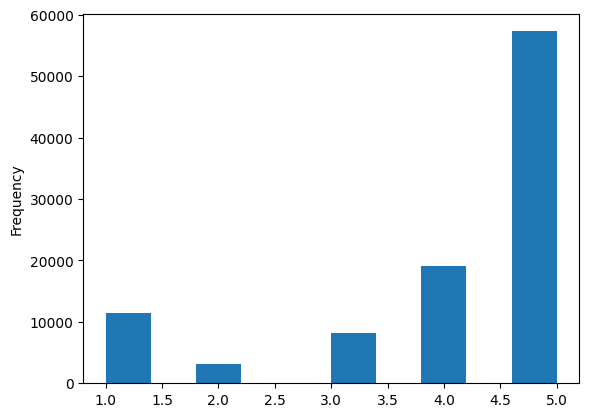

In [9]:
df_order_reviews['review_score'].plot(kind='hist')

<Axes: >

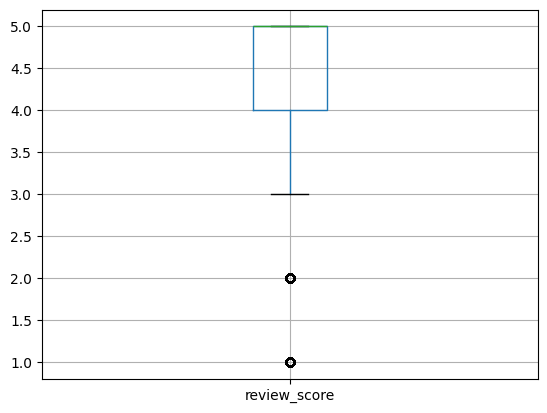

In [10]:

df_order_reviews.boxplot('review_score')

In [12]:
prompt = "How can I convert review_creation_date string to date in pandas?"
print(chat_with_gpt(prompt))

To convert the `review_creation_date` column from string to date format in pandas, you can use the `to_datetime()` function. Here's an example:

```python
import pandas as pd

# Create a sample dataframe
data = {'review_creation_date': ['2022-01-01', '2022-02-01', '2022-03-01']}
df = pd.DataFrame(data)

# Convert the 'review_creation_date' column to datetime
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])

# Print the updated dataframe
print(df)
```

Output:
```
  review_creation_date
0           2022-01-01
1           2022-02-01
2           2022-03-01
```

In this example, the `to_datetime()` function is used to convert the `review_creation_date` column to datetime format. The updated dataframe will have the `review_creation_date` column in the desired date format.


In [17]:
prompt = "How do I use 'df.plot.line' on pandas when 'df' has more than 2 columns?" 
print(chat_with_gpt(prompt))

When using `df.plot.line` in pandas, you can plot multiple lines on the same graph by specifying the columns you want to plot as a list. Here's an example of how to use `df.plot.line` when `df` has more than 2 columns:

```python
import pandas as pd

# Create a sample DataFrame
data = {'Year': [2010, 2011, 2012, 2013, 2014],
        'Sales': [100, 150, 200, 180, 250],
        'Expenses': [80, 100, 120, 100, 150],
        'Profit': [20, 50, 80, 80, 100]}
df = pd.DataFrame(data)

# Plot multiple lines
df.plot.line(x='Year', y=['Sales', 'Expenses', 'Profit'])

# Display the plot
plt.show()
```

In this example, the `x` parameter specifies the column to be used as the x-axis (in this case, 'Year'), and the `y` parameter is a list of columns to be plotted on the y-axis (in this case, 'Sales', 'Expenses', and 'Profit').

Make sure to import the necessary libraries, such as `pandas` and `matplotlib.pyplot`, before running the code.


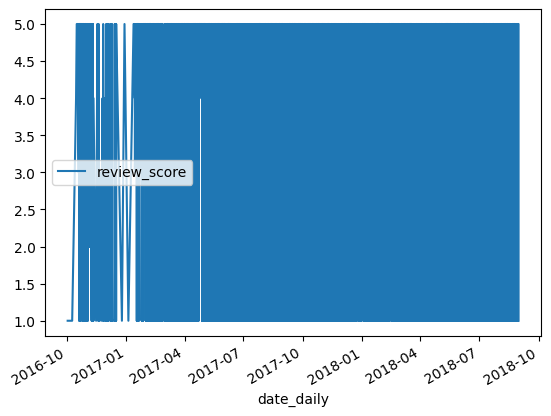

In [8]:
import matplotlib.pyplot as plt

df_order_reviews['date_daily'] = pd.to_datetime(df_order_reviews['review_creation_date'])
df_order_reviews.plot.line(x='date_daily', y='review_score')
plt.show()

In [3]:
prompt = "How can I detect internal cyclicity in data?" 
print(chat_with_gpt(prompt))

To detect internal cyclicity in data, you can use various methods and techniques. Here are a few approaches you can consider:

1. Time series analysis: If your data is in the form of a time series, you can apply time series analysis techniques such as autocorrelation and spectral analysis. Autocorrelation measures the correlation between a time series and its lagged versions, helping identify cyclical patterns. Spectral analysis, such as Fourier analysis, can reveal periodic components in the data.

2. Periodogram analysis: Periodogram analysis is a technique used to estimate the spectral density of a time series. It can help identify dominant frequencies and periodic patterns in the data.

3. Seasonal decomposition: If your data exhibits seasonal patterns, you can use seasonal decomposition techniques like seasonal decomposition of time series (STL) or seasonal and trend decomposition using Loess (STL) to separate the data into its seasonal, trend, and residual components. This can he

In [4]:
prompt = "Values in my data are categorical, with possible values of 1, 2, 3, 4, 5. They are review scores given to orders by customers. Can you propose a method to detect if there are any cyclical dependencies of the score in time?"
print(chat_with_gpt(prompt))

One method to detect cyclical dependencies of the score in time is by using autocorrelation analysis. Autocorrelation measures the correlation between a variable and its lagged values at different time intervals. In your case, you can calculate the autocorrelation of the review scores at different lag intervals to determine if there is any cyclical pattern.

Here's a step-by-step approach to perform autocorrelation analysis:

1. Prepare your data: Arrange your data in a time series format, with the review scores and corresponding timestamps.

2. Calculate lagged values: Create lagged versions of your review scores by shifting the values by different time intervals. For example, you can create lagged versions at intervals of 1 day, 1 week, 1 month, etc.

3. Calculate autocorrelation: Use a statistical software or programming language (such as Python or R) to calculate the autocorrelation coefficient for each lagged version. The autocorrelation coefficient ranges from -1 to 1, where valu

In [6]:
prompt = "Values in my data are categorical, with possible values of 1, 2, 3, 4, 5. They are review scores given to orders by customers. \
Can you propose a method to detect if there are any cyclical dependencies of the score in time using Pandas?"
print(chat_with_gpt(prompt))

One possible method to detect cyclical dependencies of the score in time using Pandas is by using autocorrelation analysis. Autocorrelation measures the correlation between a variable and its lagged values at different time intervals.

Here's a step-by-step approach to perform autocorrelation analysis on your categorical review scores using Pandas:

1. Import the necessary libraries:
```python
import pandas as pd
import matplotlib.pyplot as plt
```

2. Load your data into a Pandas DataFrame:
```python
data = pd.read_csv('your_data.csv')
```

3. Convert the review scores column to a categorical data type:
```python
data['scores'] = data['scores'].astype('category')
```

4. Create a new column with the lagged values of the scores:
```python
data['lagged_scores'] = data['scores'].shift()
```

5. Compute the autocorrelation using the `pd.Series.autocorr()` method:
```python
autocorr = data['scores'].autocorr()
```

6. Plot the autocorrelation values:
```python
plt.plot(autocorr)
plt.xlabel

0.0027565388678705135

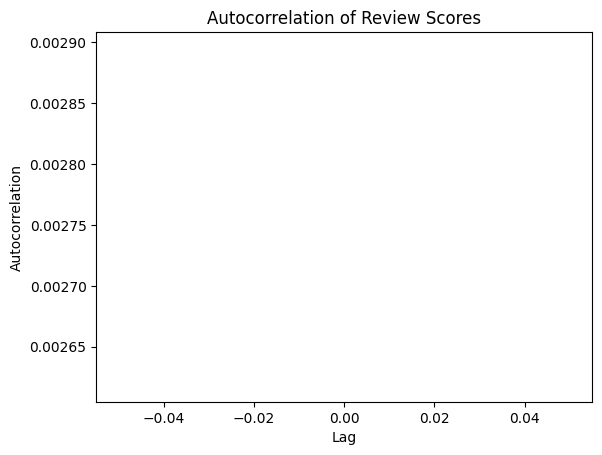

In [20]:
df_order_reviews['scores'] = df_order_reviews['review_score'].astype('category')
df_order_reviews['lagged_scores'] = df_order_reviews['scores'].shift()
autocorr = df_order_reviews['scores'].autocorr()
display(autocorr)
plt.plot(autocorr)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Review Scores')
plt.show()

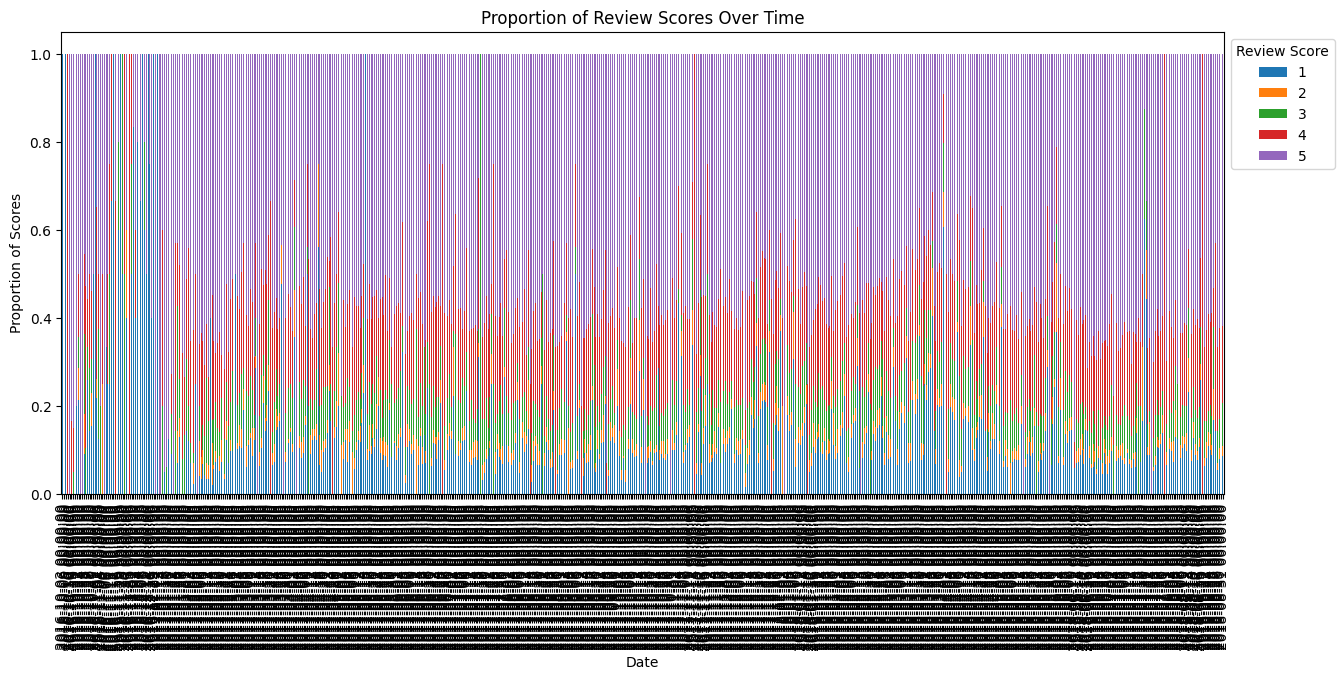

In [21]:
# Group by date_daily and calculate the proportion of each score 
score_counts = df_order_reviews.groupby(['date_daily', 'review_score']).size().unstack(fill_value=0)
score_proportions = score_counts.div(score_counts.sum(axis=1), axis=0)
score_proportions.plot(kind='bar', stacked=True, figsize=(15, 6)) 
plt.xlabel('Date')
plt.ylabel('Proportion of Scores')
plt.title('Proportion of Review Scores Over Time') 
plt.legend(title='Review Score', bbox_to_anchor=(1, 1)) 
plt.show()

In [22]:
prompt = "How woukd I change the frequency to monthly"
print(chat_with_gpt(prompt))

To change the frequency to monthly, you would need to specify that you want something to occur or be done once every month. Here are a few examples of how you can express this change:

1. If you have a recurring event or meeting, you can inform the participants that it will now take place on a monthly basis.
2. If you receive a newsletter or subscription service, you can request to switch from a weekly or quarterly frequency to a monthly one.
3. If you have a payment plan or subscription that is billed on a different schedule, you can contact the provider and ask to switch to a monthly billing cycle.
4. If you are tracking or analyzing data, you can adjust the time frame to measure or report on a monthly basis instead of a different interval.

Remember to communicate your preference clearly and make sure all relevant parties are aware of the change in frequency.


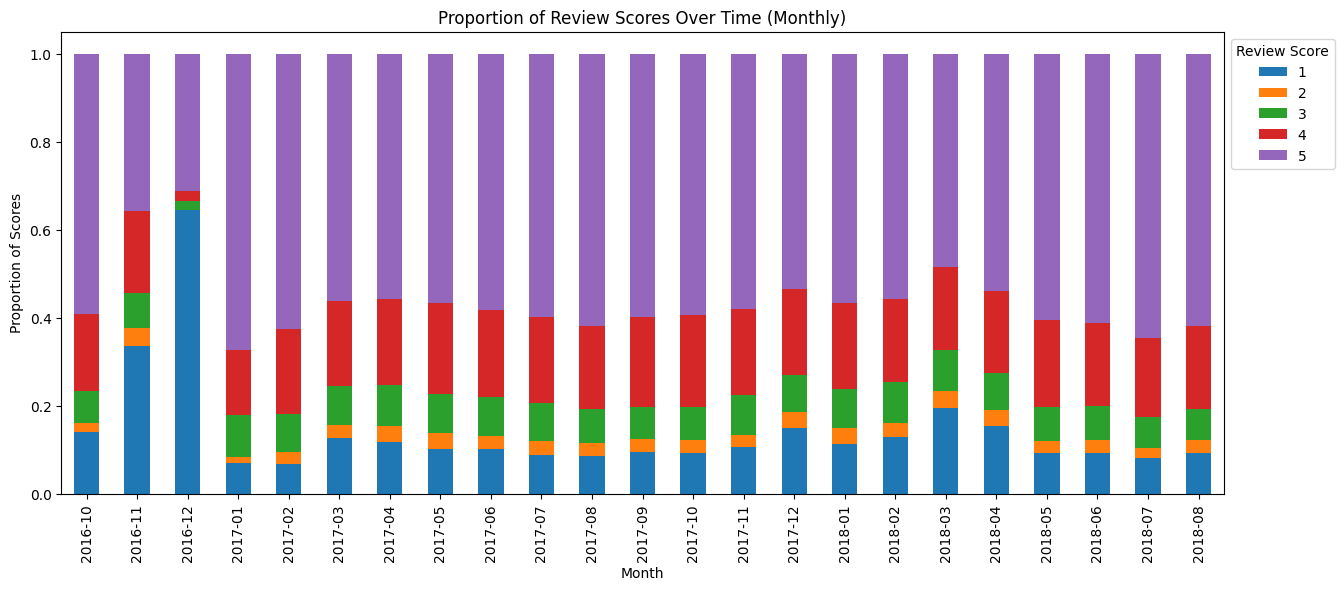

In [25]:
df_order_reviews['review_creation_date'] = pd.to_datetime(df_order_reviews['review_creation_date'])
df_order_reviews['month'] = df_order_reviews['review_creation_date'].dt.to_period('M')
score_counts = df_order_reviews.groupby(['month', 'review_score']).size().unstack(fill_value=0)
score_proportions = score_counts.div(score_counts.sum(axis=1), axis=0)
score_proportions.plot(kind='bar', stacked=True, figsize=(15, 6)) 
plt.xlabel('Month')
plt.ylabel('Proportion of Scores')
plt.title('Proportion of Review Scores Over Time (Monthly)') 
plt.legend(title='Review Score', bbox_to_anchor=(1, 1)) 
plt.show()

In [26]:
prompt = "Can you propose how I can investigate the relationship between the 'review_answer_timestamp' and the 'review_creation_date' columns?"
print(chat_with_gpt(prompt))

To investigate the relationship between the 'review_answer_timestamp' and 'review_creation_date' columns, you can follow these steps:

1. Data Preparation: Ensure that the 'review_answer_timestamp' and 'review_creation_date' columns are in a suitable format for analysis. Convert them to a standardized date/time format if necessary.

2. Calculate Time Difference: Create a new column to calculate the time difference between the 'review_answer_timestamp' and 'review_creation_date'. This will help you understand the time taken to answer each review.

3. Descriptive Statistics: Calculate descriptive statistics for the time difference column, such as mean, median, minimum, maximum, and standard deviation. This will provide an overview of the relationship between the two columns.

4. Visualize the Data: Create visualizations to explore the relationship visually. Some possible visualizations include:
   - Scatter plot: Plot the 'review_creation_date' on the x-axis and 'review_answer_timestamp'